In [11]:
import pandas as pd

#giving directory path
file_path = 'North_America-United_States.csv'
data = pd.read_csv(file_path)

#displaying the data
data.head()


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9383068,840,USA44621,44621,24 June 2022,2022,1,Protests,Excessive force against protesters,Protesters (United States),...,Cedar Rapids,41.9738,-91.6768,1,KCRG-TV9; Network Contagion Research Institute...,Local partner-National,"On 24 June 2022, 'pro-choice' protesters gathe...",0,1656458658,USA
1,9383099,840,USA44775,44775,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,Fayetteville,36.0626,-94.1574,1,Southwest Times Record; 40/29,Subnational,"On 24 June 2022, well over 100 people includin...",0,1656458658,USA
2,9383100,840,USA44783,44783,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,Eureka,40.8040,-124.1654,1,Lost Coast Outpost; North Coast Journal,Subnational,"On 24 June 2022, hundreds of people rallied ou...",0,1656458658,USA
3,9383101,840,USA44788,44788,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,West Hollywood,34.0900,-118.3617,1,CBS News; Liveuamap,Local partner-New media,"On 24 June 2022, hundreds of people rallied in...",0,1656458658,USA
4,9383102,840,USA44793,44793,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,Monterey,36.6031,-121.8936,1,Monterey County Herald; KSBW8,Subnational,"On 24 June 2022, hundreds of people rallied at...",0,1656458658,USA


In [13]:
# Formatting the 'event_date' column to datetime format
data['event_date'] = pd.to_datetime(data['event_date'], format='%d %B %Y')

# ensuring 'event_date' is datetime64
data.dtypes


data_id                      int64
iso                          int64
event_id_cnty               object
event_id_no_cnty             int64
event_date          datetime64[ns]
year                         int64
time_precision               int64
event_type                  object
sub_event_type              object
actor1                      object
assoc_actor_1               object
inter1                       int64
actor2                      object
assoc_actor_2               object
inter2                       int64
interaction                  int64
region                      object
country                     object
admin1                      object
admin2                      object
admin3                     float64
location                    object
latitude                   float64
longitude                  float64
geo_precision                int64
source                      object
source_scale                object
notes                       object
fatalities          

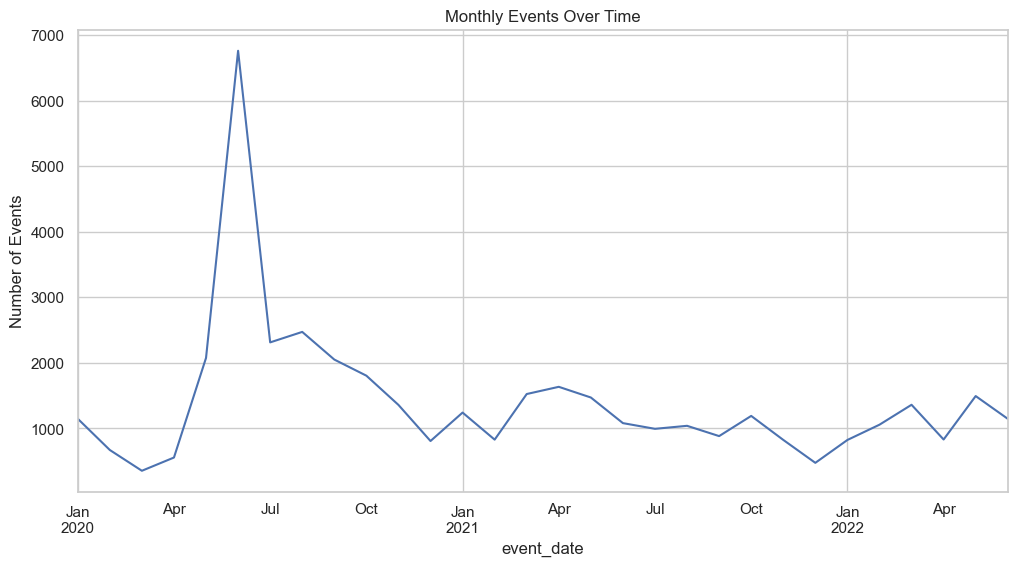

In [14]:

data.set_index('event_date', inplace=True)

# categorizing data by month and counting the number of events
monthly_events = data.resample('M').size()


import matplotlib.pyplot as plt
import seaborn as sns

# giving plotting details like graph background, title and axis names
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
monthly_events.plot(title='Monthly Events Over Time')
plt.ylabel('Number of Events')
plt.show()



<Figure size 1400x700 with 0 Axes>

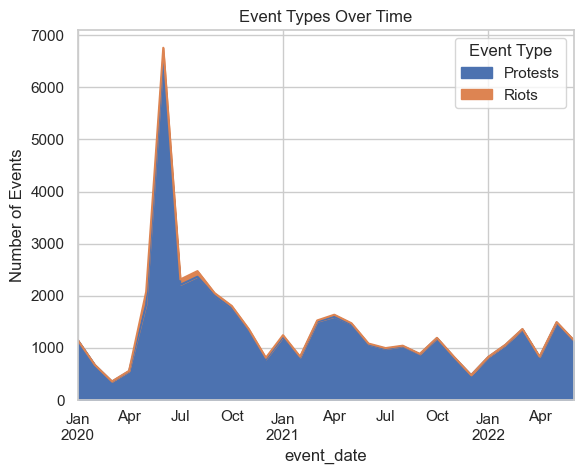

In [20]:
# grouping data by event type and resampling by month
event_types_monthly = data.groupby('event_type').resample('M').size().unstack(0)

plt.figure(figsize=(14, 7))
event_types_monthly.plot(kind='area', stacked=True, title='Event Types Over Time')
plt.ylabel('Number of Events')
plt.legend(title='Event Type')
plt.show()


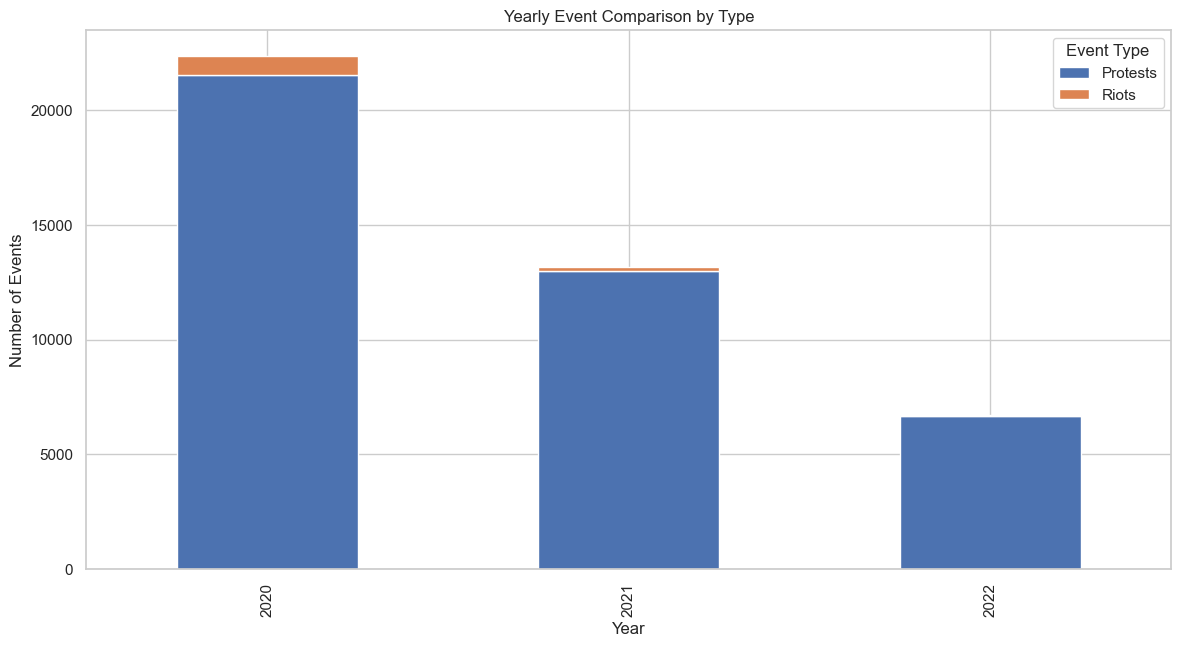

In [16]:
# grouping data by year and event type
yearly_events = data.groupby([data.index.year, 'event_type']).size().unstack()


yearly_events.plot(kind='bar', stacked=True, figsize=(14, 7), title='Yearly Event Comparison by Type')
plt.ylabel('Number of Events')
plt.xlabel('Year')
plt.legend(title='Event Type')
plt.show()


In [57]:
# Grouping data by the 'admin1' column (which stands for state) and counting incidents
state_counts = data['admin1'].value_counts()

# changin the index to state_counts defined earlier and converting the column to dataframes for easier plotting
state_counts_df = state_counts.reset_index()
state_counts_df.columns = ['State', 'Incidents']


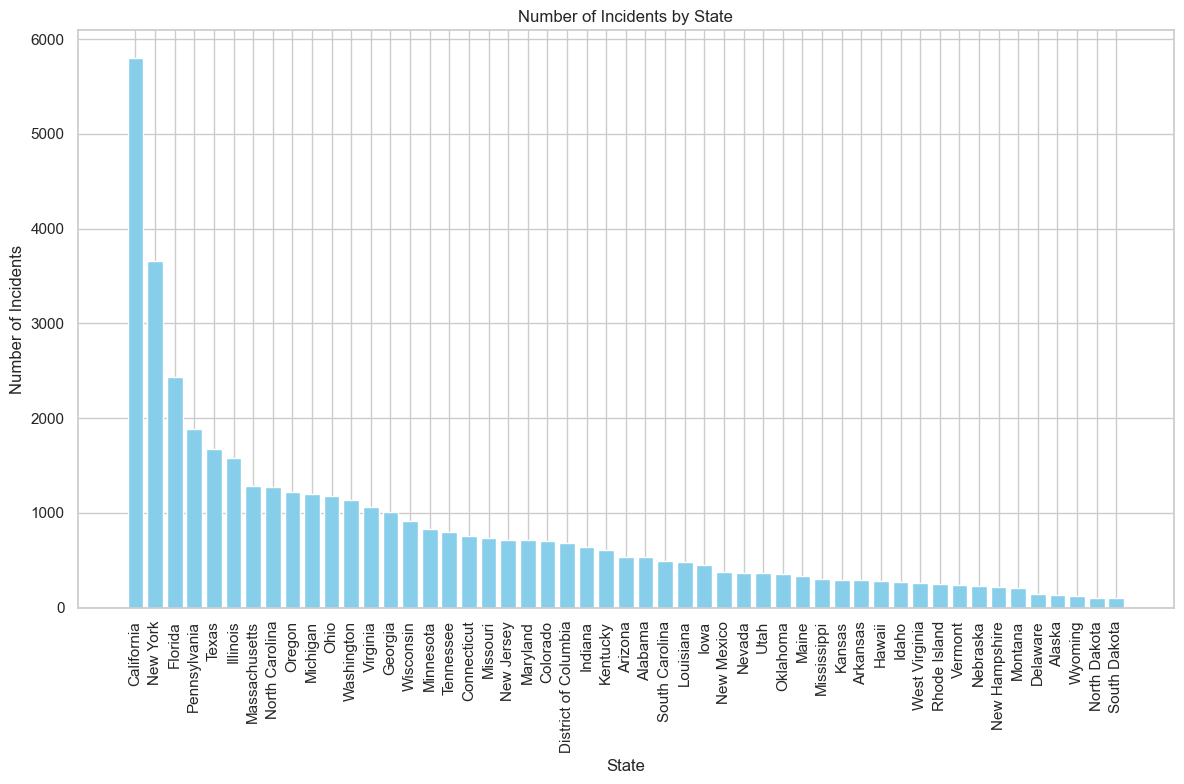

In [38]:
# Plotting a bar chart
plt.figure(figsize=(12, 8))
plt.bar(state_counts_df['State'], state_counts_df['Incidents'], color='skyblue')
plt.title('Number of Incidents by State')
plt.xlabel('State')
plt.xticks(rotation=90)  # Rotating the state names for better visibility
plt.ylabel('Number of Incidents')
plt.tight_layout()  # Adjusting layout to fit state labels
plt.show()


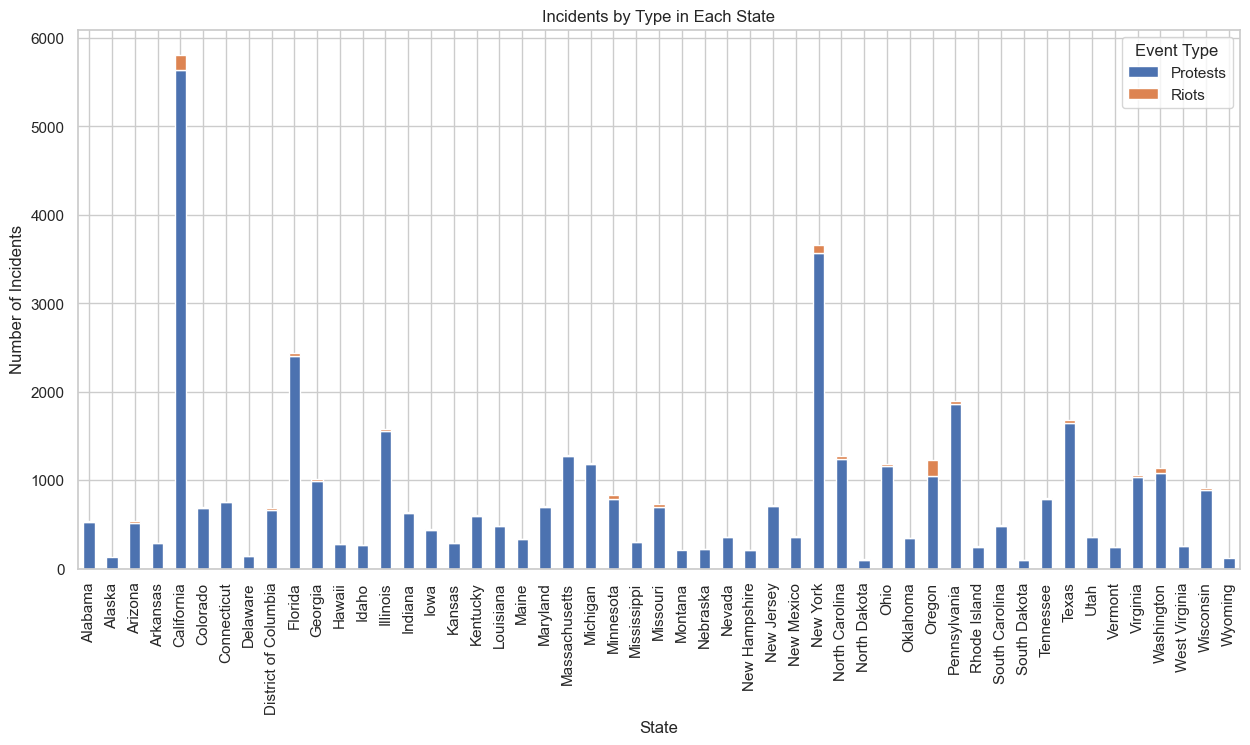

In [58]:
# Group by 'admin1' (which is the state) and the event type, then count the occurrences
state_incidents = data.groupby(['admin1', 'event_type']).size().unstack()
# Ploting a stacked bar chart
state_incidents.plot(kind='bar', stacked=True, figsize=(15, 7))

# Adding title and labels
plt.title('Incidents by Type in Each State')
plt.xlabel('State')
plt.ylabel('Number of Incidents')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Adding legend to the axis
plt.legend(title='Event Type')

# Showing the plot
plt.show()


In [47]:
# filling "unknown" value where data is missing
data['assoc_actor_1'] = data['assoc_actor_1'].fillna('Unknown')


In [48]:
# Grouping data by 'assoc_actor_1' and counting incidents
actor_counts = data['assoc_actor_1'].value_counts()

# Focusing on the top 10 actors for simplicity
top_actors = actor_counts.head(10)

# Resetting the index and converting the column to dataframes
top_actors_df = top_actors.reset_index()
top_actors_df.columns = ['Actor', 'Incidents']


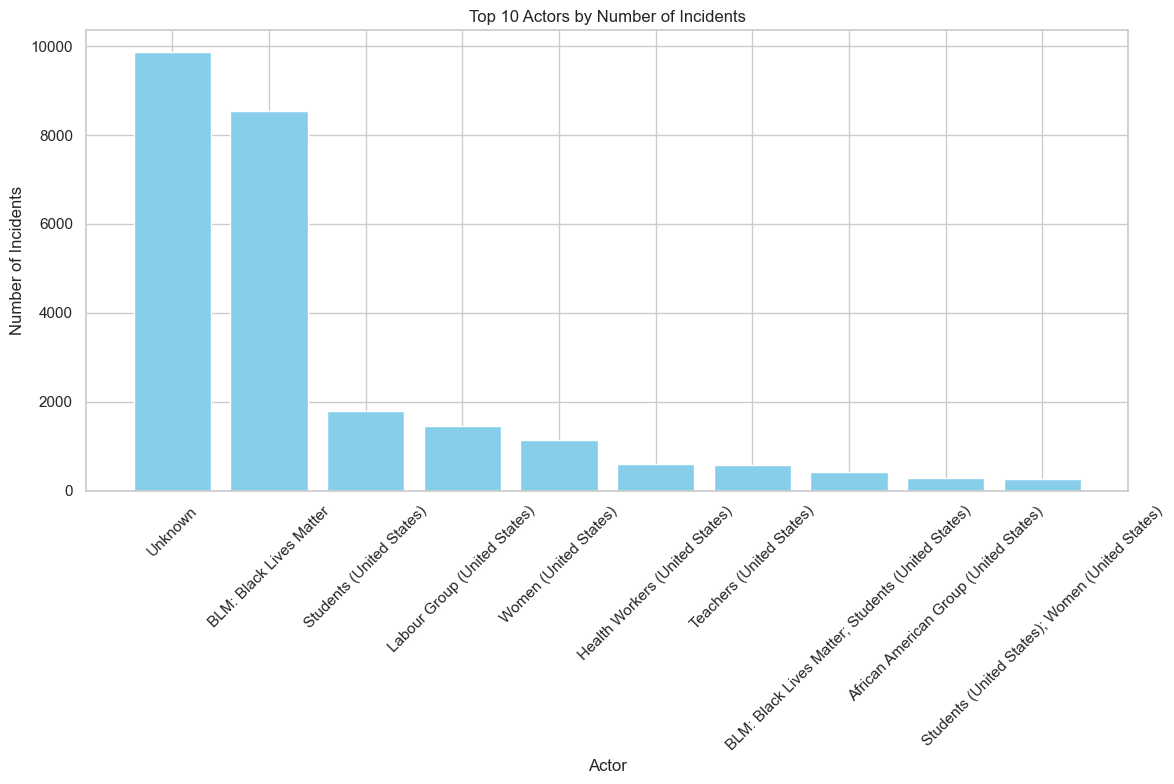

In [49]:
# Ploting a bar chart for the top actors
plt.figure(figsize=(12, 8))
plt.bar(top_actors_df['Actor'], top_actors_df['Incidents'], color='skyblue')
plt.title('Top 10 Actors by Number of Incidents')
plt.xlabel('Actor')
plt.xticks(rotation=45)  # Rotate actor names for better readability
plt.ylabel('Number of Incidents')
plt.tight_layout()  # Adjust layout
plt.show()
